In [1]:
import pandas as pd
import numpy as np
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

# Select data 2015, include only verified purchases

In [3]:
df_path = '/Users/linwang/Documents/AmaRec/data/'
df = pd.read_csv(df_path + 'raw/raw_data.csv')
df = df[(df['review_date']>'2014-12-31') & (df['verified_purchase']==1)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 451648 entries, 0 to 503518
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   marketplace        451648 non-null  object
 1   customer_id        451648 non-null  int64 
 2   review_id          451648 non-null  object
 3   product_id         451648 non-null  object
 4   product_parent     451648 non-null  int64 
 5   product_title      451648 non-null  object
 6   product_category   451648 non-null  object
 7   star_rating        451648 non-null  int64 
 8   helpful_votes      451648 non-null  int64 
 9   total_votes        451648 non-null  int64 
 10  vine               451648 non-null  int64 
 11  verified_purchase  451648 non-null  int64 
 12  review_headline    451646 non-null  object
 13  review_body        451530 non-null  object
 14  review_date        451648 non-null  object
dtypes: int64(7), object(8)
memory usage: 55.1+ MB


### Check for missing values

In [4]:
n_null_rating = df['star_rating'].isna().sum()
print(f'Number of null rating values: {n_null_rating}')

Number of null rating values: 0


# Text data: EDA

### Plot raw product titles

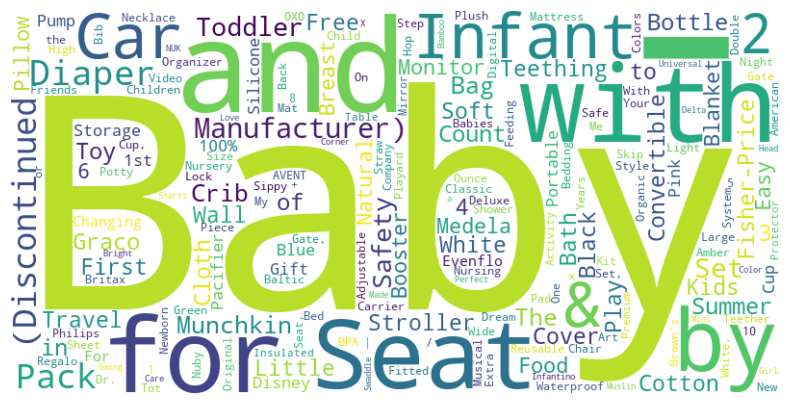

In [6]:
combined_text = ' '.join(df['product_title'].dropna())
word_frequencies = Counter(combined_text.split())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_frequencies)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('raw_product-title-wordcloud.png')
plt.show()

### Plot raw peview headline

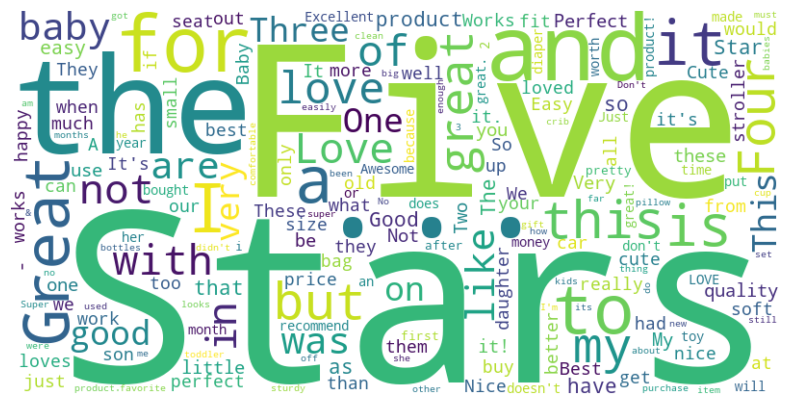

In [7]:
combined_text = ' '.join(df['review_headline'].dropna())
word_frequencies = Counter(combined_text.split())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_frequencies)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('raw_review_headline-wordcloud.png')
plt.show()

### Plot raw review body

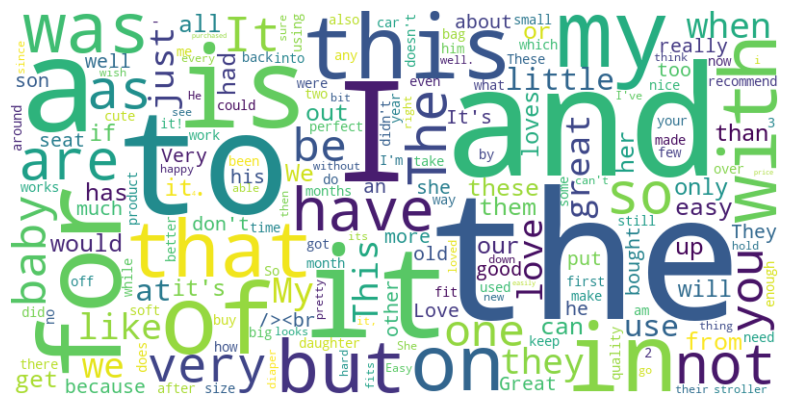

In [8]:
combined_text = ' '.join(df['review_body'].dropna())
word_frequencies = Counter(combined_text.split())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_frequencies)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('raw_review_body-wordcloud.png')
plt.show()

# Text data: pre-processing

In [9]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('words')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
import re

[nltk_data] Downloading package punkt to /Users/linwang/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/linwang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /Users/linwang/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/linwang/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [10]:
stop_words = stopwords.words('english')
custom_stop_words = ["'s", "n't", "'m", "br", "'n", "'ve", "'re", "...", "."]
all_stop_words = set(stop_words + custom_stop_words)

def preprocess_text(text):
    if pd.isnull(text):
      return ''

    # Text lowercasing
    text = text.lower()

    # Tokenization
    tokens = word_tokenize(text)

    # Removing punctuation
    tokens = [word for word in tokens if word not in string.punctuation]

    # Removing stopwords
    tokens = [word for word in tokens if word not in all_stop_words]

    # Removing numbers
    tokens = [word for word in tokens if not word.isdigit()]

    # Removing special characters or non-ASCII characters
    tokens = [re.sub(r'[^\x00-\x7F]+', '', word) for word in tokens]

    # Normalization - Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Join the tokens back into a single string
    processed_text = ' '.join(tokens)
    return processed_text

### Plot pre-processed product titles

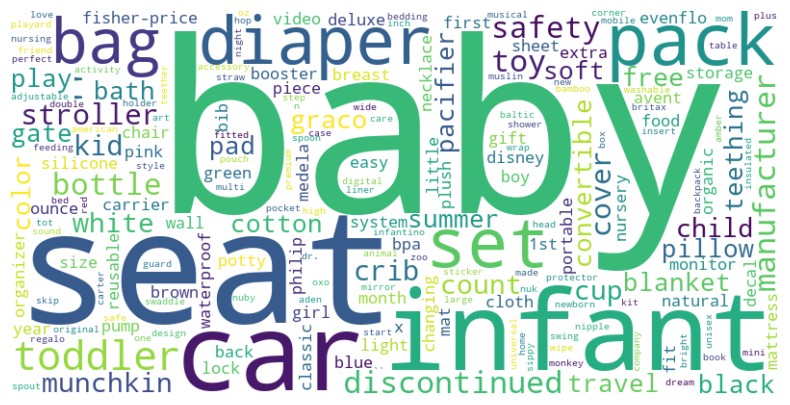

In [11]:
prod_title = df['product_title'].apply(preprocess_text)
combined_text = ' '.join(prod_title)
word_frequencies = Counter(combined_text.split())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_frequencies)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('product-title-wordcloud.png')
plt.show()

### Plot pre-processed product review headlines

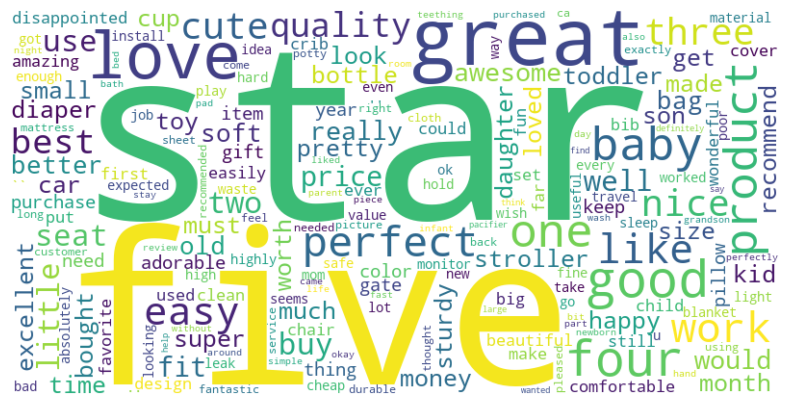

In [12]:
review_headline = df['review_headline'].apply(preprocess_text)
combined_text = ' '.join(review_headline)
word_frequencies = Counter(combined_text.split())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_frequencies)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('review-headline-wordcloud.png')
plt.show()

### Plot pre-processed review body

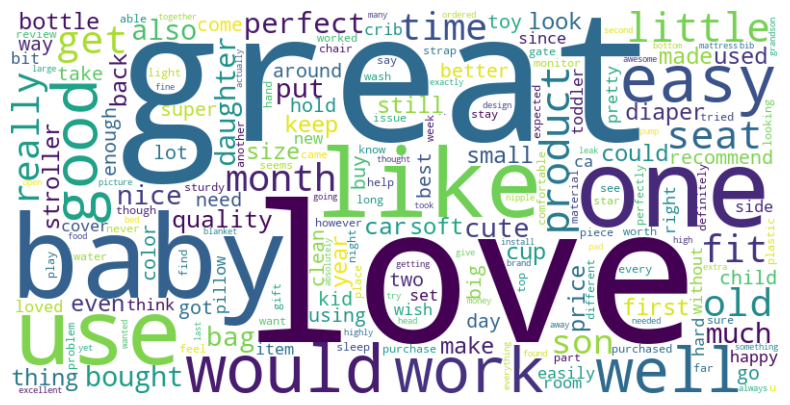

In [13]:
review_body = df['review_body'].apply(preprocess_text)
combined_text = ' '.join(review_body)
word_frequencies = Counter(combined_text.split())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_frequencies)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('review-body-wordcloud.png')
plt.show()

### Save the pre-processed text data together with other data

In [18]:
df_sub = df[['customer_id', 'review_id', 'product_id', 'review_date', 'star_rating', 'product_title','review_headline','review_body']]
df_sub = df_sub.rename(columns={'product_title': 'raw_product_title', 'review_headline': 'raw_review_headline', 'review_body': 'raw_review_body'})
df_text = pd.concat([prod_title, review_headline, review_body], axis=1)
df_comb = pd.concat([df_sub,df_text],axis=1)

df_comb.to_csv(df_path + 'processed/data_textcleaned.csv', index=False)

df_comb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 451648 entries, 0 to 503518
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   customer_id          451648 non-null  int64 
 1   review_id            451648 non-null  object
 2   product_id           451648 non-null  object
 3   review_date          451648 non-null  object
 4   star_rating          451648 non-null  int64 
 5   raw_product_title    451648 non-null  object
 6   raw_review_headline  451646 non-null  object
 7   raw_review_body      451530 non-null  object
 8   product_title        451648 non-null  object
 9   review_headline      451648 non-null  object
 10  review_body          451648 non-null  object
dtypes: int64(2), object(9)
memory usage: 41.3+ MB
